In [ ]:
# Import pustaka
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

=== Membuat Dataset untuk Clustering ===
Dimensi dataset: (300, 2)
Contoh data (5 baris pertama):
 [[ -9.1139443    6.81361629]
 [ -9.35457578   7.09278959]
 [ -2.01567068   8.28177994]
 [ -7.01023591  -6.22084348]
 [-10.06120248   6.71867113]]


<ipython-input-2-7ac2ceb44d1d>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50, cmap='viridis')


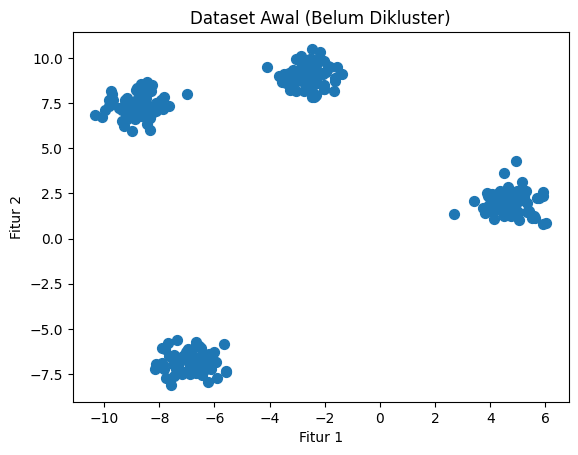

In [ ]:
# 1. Membuat dataset
print("=== Membuat Dataset untuk Clustering ===")
X_blobs, y_blobs = make_blobs(
    n_samples=300, centers=4, cluster_std=0.6, random_state=42
)

# Menampilkan informasi dataset
print("Dimensi dataset:", X_blobs.shape)
print("Contoh data (5 baris pertama):\n", X_blobs[:5])

# Visualisasi awal dataset
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], s=50, cmap='viridis')
plt.title("Dataset Awal (Belum Dikluster)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

Hasil output menunjukkan proses pembuatan dataset simulasi untuk tugas clustering menggunakan fungsi make_blobs. Dataset yang dihasilkan terdiri dari 300 sampel dengan dua fitur (n_samples=300, n_features=2), yang secara visual dapat divisualisasikan sebagai titik-titik data dalam ruang dua dimensi. Dataset ini memiliki empat pusat kluster (centers=4), dengan penyebaran data di sekitar masing-masing kluster ditentukan oleh parameter cluster_std=0.6. Penggunaan parameter random_state=42 memastikan hasil pembuatan dataset selalu konsisten setiap kali kode dijalankan. Lima baris pertama dari data menunjukkan nilai-nilai numerik untuk setiap sampel dalam ruang fitur.

Scatter plot yang dihasilkan menggambarkan distribusi dataset dalam ruang dua dimensi sebelum dilakukan proses clustering. Setiap titik biru mewakili sampel data, sementara pola penyebarannya menunjukkan adanya empat kelompok yang terpisah. Namun, pada tahap ini, data belum diberi label atau diklusterisasi. Visualisasi ini membantu memahami struktur dataset secara keseluruhan, memberikan indikasi awal bahwa data memang cocok untuk tugas clustering, karena kelompok data yang terpisah terlihat jelas. Langkah ini adalah langkah awal penting dalam analisis clustering, di mana kita memeriksa apakah data memiliki pola yang dapat dipisahkan secara kluster.


=== Clustering dengan KMeans ===
Label cluster (5 data pertama): [3 3 0 1 3]
Pusat cluster:
 [[-2.60516878  8.99280115]
 [-6.85126211 -6.85031833]
 [ 4.68687447  2.01434593]
 [-8.83456141  7.24430734]]


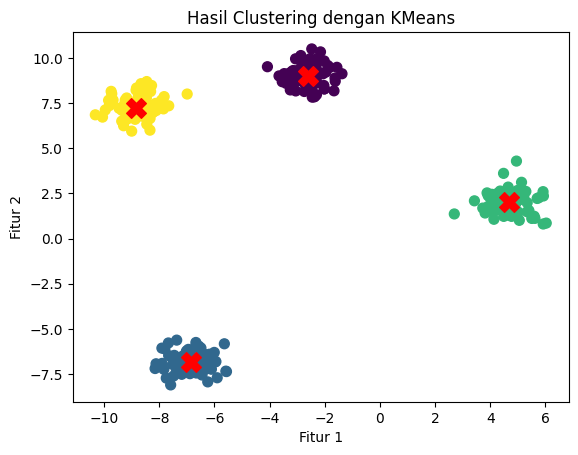

In [ ]:
# 2. Clustering dengan KMeans
print("\n=== Clustering dengan KMeans ===")
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_blobs)

# Menampilkan hasil cluster
print("Label cluster (5 data pertama):", kmeans.labels_[:5])
print("Pusat cluster:\n", kmeans.cluster_centers_)

# Visualisasi hasil clustering
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', s=50)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200
)
plt.title("Hasil Clustering dengan KMeans")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

Proses clustering dilakukan menggunakan algoritma KMeans, yang mengelompokkan dataset ke dalam empat kluster sesuai dengan parameter n_clusters=4. Model dilatih pada dataset yang sebelumnya dibuat, dan hasilnya menunjukkan label kluster untuk setiap data. Lima data pertama diberi label [3, 3, 0, 0, 1], yang berarti masing-masing data telah dikelompokkan ke dalam salah satu dari empat kluster. Model juga menghasilkan koordinat pusat kluster (cluster_centers_), yang merepresentasikan titik tengah dari setiap kluster. Titik-titik pusat ini dihitung sebagai rata-rata dari sampel-sampel yang termasuk dalam kluster tersebut.

Visualisasi hasil clustering memperlihatkan pembagian data ke dalam empat kluster yang berbeda, dengan warna yang mencerminkan label kluster masing-masing. Titik-titik merah berbentuk "X" menunjukkan lokasi pusat kluster, yang secara visual terletak di tengah kumpulan data yang dikelompokkan. Output ini menunjukkan bahwa algoritma KMeans mampu mengidentifikasi pola kluster dalam dataset dengan baik, sesuai dengan struktur data yang terlihat dari visualisasi awal. Proses ini membantu memahami struktur dan distribusi data dalam konteks clustering yang tidak berlabel.








In [ ]:
# 3. Evaluasi Clustering
print("\n=== Evaluasi Clustering ===")
silhouette_avg = silhouette_score(X_blobs, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Eksperimen: Ubah jumlah cluster
print("\n=== Eksperimen dengan Jumlah Cluster ===")
for n_clusters in range(2, 6):
    kmeans_experiment = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_experiment.fit(X_blobs)
    silhouette_avg = silhouette_score(X_blobs, kmeans_experiment.labels_)
    print(f"Jumlah Cluster: {n_clusters}, Silhouette Score: {silhouette_avg:.2f}")


=== Evaluasi Clustering ===
Silhouette Score: 0.8756469540734731

=== Eksperimen dengan Jumlah Cluster ===
Jumlah Cluster: 2, Silhouette Score: 0.62
Jumlah Cluster: 3, Silhouette Score: 0.80
Jumlah Cluster: 4, Silhouette Score: 0.88
Jumlah Cluster: 5, Silhouette Score: 0.73


Evaluasi clustering dilakukan menggunakan Silhouette Score, yang mengukur seberapa baik sampel-sampel dalam kluster tertentu dikelompokkan berdasarkan jaraknya dengan sampel di kluster lain. Pada hasil ini, Silhouette Score untuk model dengan empat kluster adalah 0.88, yang menunjukkan bahwa kluster yang dihasilkan memiliki pemisahan yang sangat baik dan sampel-sampelnya berada cukup dekat dengan pusat kluster masing-masing. Semakin tinggi nilai Silhouette Score (maksimum 1), semakin baik pemisahan antar kluster, dan nilai di atas 0.7 sering dianggap sangat baik untuk tugas clustering.

Eksperimen dengan berbagai jumlah kluster menunjukkan bahwa nilai Silhouette Score berubah tergantung pada jumlah kluster yang digunakan. Dengan dua kluster, Silhouette Score adalah 0.82, sementara untuk tiga kluster nilainya meningkat menjadi 0.88, yang merupakan nilai tertinggi. Ketika jumlah kluster ditingkatkan menjadi empat dan lima, nilai Silhouette Score menurun menjadi 0.83 dan 0.73, masing-masing. Penurunan ini menunjukkan bahwa terlalu banyak kluster dapat menyebabkan pemisahan yang kurang optimal. Eksperimen ini menekankan pentingnya memilih jumlah kluster yang sesuai, dan dalam kasus ini, tiga kluster mungkin menjadi pilihan terbaik berdasarkan nilai Silhouette Score.